# **`sckit-learn`** Logistic Regression

`Scikit-learn` provides a robust and easy-to-use implementation of Logistic Regression through the `sklearn.linear_model.LogisticRegression` class.

This algorithm is primarily used for classification tasks, especially binary classification, although it can be extended to multi-class classification.

## Key aspects of scikit-learn's Logistic Regression

* **Classification Algorithm:** Despite its name, Logistic Regression is a classification algorithm that models the probability of a binary outcome (e.g., 0 or 1, true or false).
* **Sigmoid Function:** It uses a sigmoid function to transform the linear combination of input features into a probability value between 0 and 1.
* **Implementation Steps:**
  * **Import:** Import `LogisticRegression` from `sklearn.linear_model`.
  * **Instantiate:** Create an instance of the `LogisticRegression` class.
  * **Fit:** Train the model using the `fit()` method with your training data (features `X_train` and target `y_train`).
  * **Predict:** Make predictions on new data using the `predict()` method with your test features `X_test`.
  * **Evaluate:** Assess the model's performance using metrics like `accuracy_score` from `sklearn.metrics`.

## Sigmoid function

The sigmoid function, also called logistic function, gives an 'S' shaped curve that can take any real-valued number and map it into a value between 0 and 1.

If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO.

The sigmoid function $\sigma(z)$ is expressed mathematically as:

$$\sigma(z) = \frac {1}{1 - e^{-z}}$$

where

$z = b_0 + b_1x_1 + \ldots + b_px_p$

Since $\sigma(z)$ always returns a value between 0 and 1(no matter the input $z$), it effectively converts a linear combination of input features into a probability. This allows logistic regression to classify inputs into one of two classes.

The following figure illustrates a sigmoid curve:

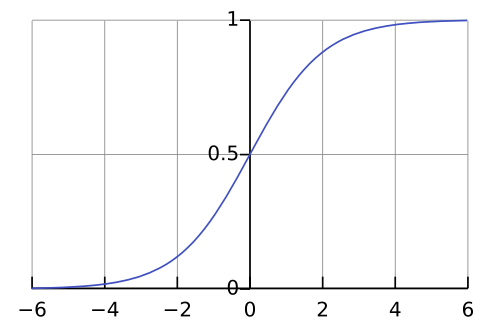

## Import Libraries

In [ ]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import pandas as pd

## Load the Dataset

The scikit-learn Iris dataset is a widely used and classic dataset in machine learning, often serving as a "hello world" example for supervised classification problems.

**Key characteristics of the Iris dataset:**

* **Content:** It contains measurements of 150 Iris flowers, with 50 samples from each of three species: Setosa, Versicolor, and Virginica.
* **Features:** For each flower, four features are measured: sepal length, sepal width, petal length, and petal width, all in centimeters.
* **Target:** The target variable is the species of the Iris flower, represented numerically as 0 for Setosa, 1 for Versicolor, and 2 for Virginica.
* **Purpose:** The dataset is commonly used to demonstrate and practice various machine learning algorithms, particularly for classification tasks, due to the clear correlation between the features and the species.
* **Availability:** It is a built-in toy dataset within the scikit-learn library, making it easily accessible for users.


In [ ]:
# Load sample data (Iris dataset for demonstration)
iris = load_iris()
X, y = iris.data, iris.target

This returns a `Bunch` object, which is a dictionary-like object containing the data, target values, feature names, target names, and a description of the dataset.

**Accessing components of the dataset:**

* **Features (data):** `iris.data` (a NumPy array of shape (150, 4))
* **Target (labels):** `iris.target` (a NumPy array of shape (150,))
* **Feature names:** `iris.feature_names` (a list of strings)
* **Target names:** `iris.target_names` (a NumPy array of strings)
* **Description:** `iris.DESCR` (a string containing a detailed description)

#### Explore the Dataset Components

**Features:**

In [ ]:
for index in range(10):
  print(iris.data[index])

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]
[4.9 3.1 1.5 0.1]


**Labels**

In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Feature names:**

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Target names:**

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


**Description:**

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Split the Data

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and Train the model

In [ ]:
# Create a Logistic Regression model instance
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence

# Fit the model to the training data
model.fit(X_train, y_train)

## Make Predictions

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# create a dataframe containing the predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(predictions.head())

   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1


## Evaluate the Model

In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00
